class
1    111
3     71
2     60
5     48
4     48
6     20
Name: count, dtype: int64

Treino:  0.9769736842105263
Teste:  0.8888888888888888

Treino:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        92
           2       0.96      0.90      0.93        51
           3       1.00      1.00      1.00        61
           4       0.89      0.95      0.92        41
           5       1.00      1.00      1.00        41
           6       1.00      1.00      1.00        18

    accuracy                           0.98       304
   macro avg       0.97      0.98      0.97       304
weighted avg       0.98      0.98      0.98       304


Teste: 
              precision    recall  f1-score   support

           1       1.00      0.89      0.94        19
           2       0.75      0.67      0.71         9
           3       1.00      0.90      0.95        10
           4       0.64      1.00      0.78         7
           5       1.00   

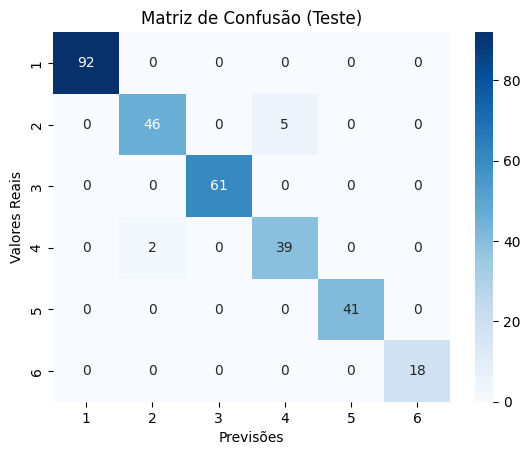

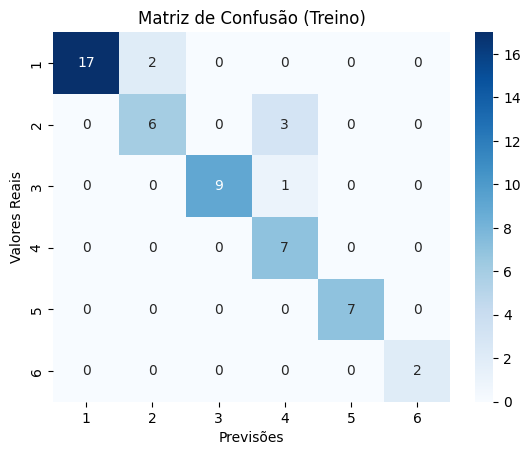

In [ ]:
import pandas as pd
import numpy as np

from joblib import dump

from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv('datashet.csv')

df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

Y = df['class']
X = df.drop('class', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,
random_state=42)

# print("Valores únicos em Y_train:", Y_train.unique())
# print("Valores únicos em Y_test:", Y_test.unique())

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
    
])

parameters = {
    'classifier__n_neighbors' : [5, 10, 12, 20, 30],
    'classifier__weights' : ['uniform', 'distance'],
    'classifier__algorithm' : ['ball_tree', 'kd_tree', 'brute'],
    'classifier__leaf_size' : [5, 8, 20, 30, 50],
}

model = GridSearchCV(
    pipe,
    parameters,
    cv = 6,
    n_jobs=4
)

model.fit(X_train, Y_train)

model = model.best_estimator_
dump(model, 'model.pkl')


print("\nTreino: ", accuracy_score(Y_train, model.predict(X_train)))
print("Teste: ", accuracy_score(Y_test, model.predict(X_test)))

# Relatório de classificação
print("\nTreino:")
print(classification_report(Y_train, model.predict(X_train)))

print("\nTeste: ")
print(classification_report(Y_test, model.predict(X_test)))

import matplotlib.pyplot as plt
import seaborn as sns

# Matriz de Confusão
cm = confusion_matrix(Y_train, model.predict(X_train))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão (Teste)')
plt.show()

# Matriz de Confusão
cm = confusion_matrix(Y_test, model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão (Treino)')
plt.show()